In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

#훈련세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
#훈련세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


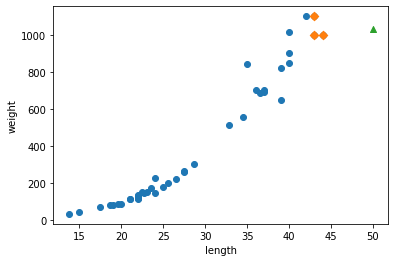

In [5]:
import matplotlib.pyplot as plt
# 50 cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [7]:
print(knr.predict([[100]]))

[1033.33333333]


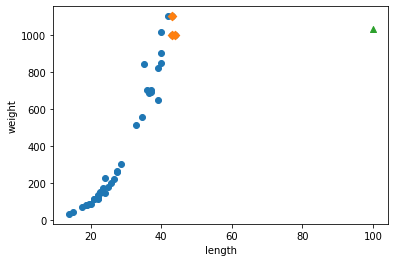

In [8]:
#100cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input,train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

머신러닝 모델은 주기적으로 훈련해야 합니다.  
머신러닝 모델은 한번 만들고 끝나는 프로그램이 아님  
사건과 환경이 변화하면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 합니다.

In [9]:
#선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다.
print(lr.predict([[50]]))

[1241.83860323]


In [10]:
#LinearRegression은 회귀분석 식을 찾는것과 같다. y=ax+b
#LinearRegression클래스가 찾은 a와 b는 lr객체의 coef_와 intercept속성에 저장되어 있음
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


coef_와 intercept_를 알고리즘으로 찾은 값이라는 의미로 model parameter라고 부릅니다.  
사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같습니다.  
이를 **모델 기반 학습**이라고 부릅니다.  
앞에서 사용한 k-최근접 이웃에는 모델 파라미터가 없습니다.  
훈련세트를 저장하는 것이 훌련의 전부였음 이부분을 사례 기반 학습이라고 부릅니다.

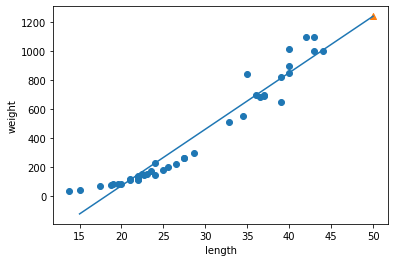

In [11]:
#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print(lr.score(train_input, train_target)) #훈련세트
print(lr.score(test_input, test_target)) #테스트세트

0.939846333997604
0.8247503123313558


훈련세트와 테스트 세트간에 약간의 차이가 있음  
훈련 세트의 점수도 높지 않은편임 전체적으로 과소적합되었다고 할 수 있음  
**다항회귀**  
선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있음  
농어의 길이와 무게에  대한 산점도를 자세히 보면 일직선이라기보다 구부러진 곡선의  
형태를 띄고 있는 것을 알 수 있음  
2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 함.
농어의 길이를 제복해서 원래 데이터 앞에 붙이기

In [20]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [21]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [22]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


다항식을 사용한 선형 회귀를 다항 회귀 polynomial regression 이라고 한다.  
2차 방정식의 계수와 절편 a, b, c를 알았으니
이전과 동일하게 훈련 세트의 산점도에 그래프로 그려보기

In [23]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


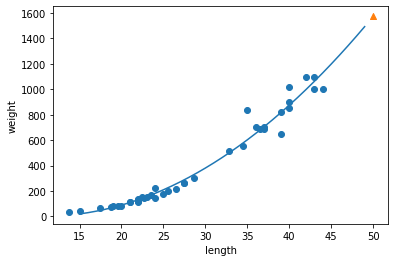

In [24]:
# 구간별 직선을 그리기 위해 15 ~ 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식의 그래프 그리기
plt.plot(point, 1.014 * point**2 - 21.6 * point + 116.05)

#50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()